# Machine Learning

## Scikit-Learn

- It is a python machine learning library, built on top of NumPy, SciPy, and Matplotlib. It helps us build machine learning models to make predictions or learn patterns from data.

### Scikit-Learn Workflow

1. Get the data ready
2. Choose the right estimator/algorithm for our problems (pick a model)
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

In [4]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y labels (labels)
y = heart_disease["target"]

In [6]:
#Our problem is classification problem
## 2.Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() #instantiate the classifier

#We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [8]:
clf.fit(X_train, y_train) #fit the model to the training data

RandomForestClassifier()

In [9]:
#make a prediction
y_preds = clf.predict(X_test)

In [10]:
y_test

287    0
19     1
72     1
226    0
202    0
      ..
136    1
274    0
262    0
160    1
84     1
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [12]:
clf.score(X_test, y_test)

0.8032786885245902

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.79      0.88      0.83        34

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[19,  8],
       [ 4, 30]])

In [15]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [16]:
# 5. Improve the model
#Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")


Trying model with 10 estimators...
Model accuracy on test set: 78.69%

Trying model with 20 estimators...
Model accuracy on test set: 85.25%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 81.97%

Trying model with 50 estimators...
Model accuracy on test set: 81.97%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 78.69%

Trying model with 80 estimators...
Model accuracy on test set: 81.97%

Trying model with 90 estimators...
Model accuracy on test set: 80.33%



In [17]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8032786885245902

#### 1. Getting your data ready

- Three main things we have to do

1. Split the data into features and labels (usually `X` and `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical data to numerical data (also called feature encoding)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# 1. Split the data into training and test sets
X = heart_disease.drop("target", axis=1) #axis=1 is columns
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape

(242, 13)

In [22]:
# 1.1 Make sure it's all numerical
## We will use the car sales data set because in the heart disease dataset everything was numerical. In car sales dataset, we will try to predict the price of the car

car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
#car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int)
#car_sales["Price"] = car_sales["Price"] / 100


Before we run a machine learning model, we have to convert the categorical variables to numbers.

In [24]:
#Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [25]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [26]:
#when we ran the above code chunk it gave an error because the car model names are not numerical it is string
#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_features)],
                                  remainder = "passthrough") #for the remainder of the columns, do not encode them and pass them

transformed_X = transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [27]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [28]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [29]:
dummies = dummies.astype(int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [30]:
#let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train);

In [31]:
model.score(X_test, y_test) #this score is normal because my dataset is super small, I am just doing this for exercise

0.3235867221569877

#### 1.2 Handling Missing Values

- There are two main ways
1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether --> you will be working with a smaller dataset since you are removing values


In [32]:
car_sales_missing = pd.read_csv('/Users/EfePersonal/Documents/ml-statistics-linear_algebra/notebooks/data_science/data/car-sales-missing-data.csv')

In [33]:
car_sales_missing.isna()

,Make,Colour,Odometer,Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,True,False,False
6,False,True,True,False,False
7,False,False,True,False,True
8,False,False,False,True,True
9,True,False,False,False,False


In [34]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [35]:
#Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [36]:
#Let's try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_features)],
                                  remainder = "passthrough") #for the remainder of the columns, do not encode them and pass them

transformed_X = transformer.fit_transform(X)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40 stored elements and shape (10, 16)>

In [37]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


##### Option 1: fill missing data with pandas

In [38]:
##Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

##Fill the "Color" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

## Fill the "Odometer" column
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(), inplace=True)

#Fill the Doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

/var/folders/69/6rjp6hcn2cn2ypx9h4gf_zlh0000gp/T/ipykernel_19013/49639196.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
/var/folders/69/6rjp6hcn2cn2ypx9h4gf_zlh0000gp/T/ipykernel_19013/49639196.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [39]:
#Check our dataframe again
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       2
dtype: int64

In [40]:
#Remove the missing rows in Price

car_sales_missing.dropna(inplace=True)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,missing,92302.666667,4.0,"$7,500"
9,missing,White,31600.000000,4.0,"$9,700"


In [41]:
car_sales_missing["Price"] = car_sales_missing["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int)
car_sales_missing["Price"] = car_sales_missing["Price"] / 100

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/69/6rjp6hcn2cn2ypx9h4gf_zlh0000gp/T/ipykernel_19013/3227874550.py:1: SyntaxWarning: invalid escape sequence '\$'
  car_sales_missing["Price"] = car_sales_missing["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int)


In [42]:
len(car_sales_missing)

8

In [43]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_features)],
                                  remainder = "passthrough") #for the remainder of the columns, do not encode them and pass them

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.50043000e+05, 4.00000000e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 8.78990000e+04, 5.00000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.23026667e+04, 7.00000000e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.000

##### Option 2: Fill missing values with Scikit-Learns

In [45]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [46]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
car_sales_missing.dropna(subset=["Price"], inplace=True) #drop the rows where price is missing
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [48]:
#Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [49]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [50]:
#Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

#Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]


#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([ #ColumnTransformer applies transformers to columns of an array or pandas DataFrame, and it can take multiple transformers
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

#Transform the data
filled_X = imputer.fit_transform(X)

In [51]:
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [52]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [53]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_features)],
                                  remainder = "passthrough") #for the remainder of the columns, do not encode them and pass them

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [55]:
#Now we've got our data as numbers and filled (no missing values)
#Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test) #because we have a small dataset, the score is not good

0.21990196728583944

**To sum up:** 
- The process of filling missing values is called **imputation**.
- The process of turming of your non-numerical values into numerical values is referred to as feature engineering or feature encoding.


#### 2. Choosing the right estimator/algorithm for our problems

- Scikit-Learn refers to machine learning models and algorithms as **estimators**.
- **Classification problem** - predicting a category (heart disease or not)
    - Sometimes you'll see `clf` (short for classifier) used as classification estimator
- **Regression problem** - predicting a number (selling price of a car)

If you're working on a machine learning problem and looking to use, learn and not sure what model you should use, refer to the Scikit-Learn machine learning map.
- https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

##### 2.1 Picking machine learning model for a regression problem

- We will use the California Housing dataset.
- The target variable is the median house value for California districts expressed in hundreds of thousands of dollars.

In [56]:
#Get California Housing dataset
import os
import certifi

os.environ['SSL_CERT_FILE'] = certifi.where()

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [57]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [58]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [59]:
# housing_df = housing_df.drop("MedHouseVal",axis=1)
# housing_df

In [60]:
#we have to split our data first 

#import algorithm

#Setup randomseed
np.random.seed(42)

#Create the data
X= housing_df.drop("target", axis=1)
y = housing_df["target"] #median house value

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#Instantiate and fir the model (on the training set)
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

#Check the score of the model (on the test set)

model.score(X_test, y_test) #the result is called R^2 score

0.5758549611440125

- What if `Ridge` didn't work or the score didn't fit our needs?
- We can try a different model.
- After checking the sklearn model map, for now we decided to trt Ensemble Models

**Ensemble Models** 

- The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability and robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

- In **averaging methods**, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimators because it's variance is reduced. **Bagging methods, Forest of randomized trees** (random forest is lots of decision trees coming together)

- By contrast, in **boosting methods**, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to product a powerful ensemble. **AdaBoost, Gradient Tree Boosting**

- For the next exercise, we decided to use RandomForestRegressor.

- **Random Forest Regressor** - A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the `max_samples` parameter if `bootstrap=True` (default), otherwise the whole data is used to build each tree.

In [61]:
#implementing RandomForestRegressor

#import the model class from ensemble module
from sklearn.ensemble import RandomForestRegressor

#set up the random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] #median house value

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train) #fit the model to the training data

#Check the score of the model (on the test set)
model.score(X_test, y_test) #the result is called R^2 score

0.8059809073051385

## 2.2 Picking a machine learning model for a classification problem

- I picked the iris dataset from sklearn. It is a dataset to classify iris plants based on their features.

In [62]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading iris dataset
from sklearn.datasets import load_iris
iris = load_iris()



In [63]:
#Setting up the random seed and data as X and y

np.random.seed(42)

X = iris.data
y = iris.target

In [64]:
#Splitting the data into train and test sets and creating the target column in our dataframe
features_names = iris.feature_names
target_names = iris.target_names

iris_df = pd.DataFrame(columns=features_names, data=iris)
iris_df['species'] = [target_names[i] for i in y]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)
model.score(X_test, y_test)



1.0

- Now following the course, I will use the heart disease dataset.

In [66]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- Consulting the map and it says to try the `LinearSVC`

In [67]:
#Import LinearSVC estimator class
from sklearn.svm import LinearSVC

#random seed
np.random.seed(42)

#make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate the model
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

#Evaluate the model
clf.score(X_test, y_test)


0.8688524590163934

- LinearSVC worked well in this case. If it does not work well, you can go and try KNeighborsClassifier or RandomForestClassifier.

- We will skip `KNeighborsClassifier` and experiment with `RandomForestClassifier` because it is an ensemble model and it is a good idea to try ensemble models when you are not sure which model to use.

In [68]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Setup random seed 
np.random.seed(42)

#Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Split the data
X_Train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate the RandomForest_Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#evaluate the model RandomForest_Classifier
clf.score(X_test, y_test)


0.8524590163934426

NOTE:
- If you have structured data, use ensemble methods (e.g., tabular data, CSV files, Excel files)
- If you have unstructured data, use deep learning or transfer learning. (e.g., images, text, audio, video)

## 3 Fit the model/algorithm on our data and use it to make predictions

### 3.1. Fitting the model to the data

- `X` = features, features variables, data
- `y` = labels, targets, target variable

In [69]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Setup random seed 
np.random.seed(42)

#Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#Split the data
X_Train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate the RandomForest_Classifier
clf = RandomForestClassifier(n_estimators=100)

#Fit the model to the data
clf.fit(X_train, y_train)

#evaluate the model RandomForest_Classifier
clf.score(X_test, y_test)


0.8524590163934426

## 3.2. Make predictions using a machine learning model

- 2 ways to make predictions:
1. `predict()` - returns the predicted labels for the input samples
2. `predict_proba()` - returns the probability of the input samples for all classes in the classification problem

In [70]:
# Use a trained model to make predictions
#clf.predict(np.array([1 ,7, 8, 10, 12])) #this doesn't work

In [71]:
clf.predict(X_test) #this works because our model saw the training data

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [72]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

Now, what we've done is we've made predictions on the test data (`X_test`) to predict whether someone or not has heart disease. Now our labels (`y_test`) are in the same format as our test labels, so our predictions are in the same format as our test labels. So we can compare the predictions (`X_test`) to truth (`y_test`) to see how well our model did.

In [73]:
#Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test) #this is the accuracy of the model

np.float64(0.8524590163934426)

In [74]:
clf.score(X_test, y_test) #returns the mean accuracy on the given test data and labels

0.8524590163934426

In [75]:
#another way but the same thing to see your accuracy score of your model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds) #this is the accuracy of the model

0.8524590163934426

- `predict()` vs. `predict_proba()`

- `predict_proba()` - probability estimates. The returned estimates for all classes are ordered by the label of classes. For a multi_class problem, if multi_class is set to be "multinomial" the softmax function is used to find the predicted probability of each class. Else use a one-vs-rest appraoch, i.e calculate the probability of each class assuming it to be positive eusing the logistic function, and normalize these valules across all classes.

In [76]:
#predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])
## predict_proba returns the probabilities of the labels

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [77]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models

In [78]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [80]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#Create random forest model
model = RandomForestRegressor()

#Fit the model to data
model.fit(X_train, y_train)

#Make predictions
y_preds = model.predict(X_test)

In [82]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [84]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [85]:
#Compare the predictions to the truth labels
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270458119670544

In [86]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

- First you do the predictions with `y_preds`, and then we compare our prediction with the truth labels (`y_test`) to see how well our model did.

## 4. Evaluating a machine learning model

- Three ways to evaluate Scikit-Learn models:
    1. Estimator's built-in `score()` method
    2. The `scoring` parameter
    3. Problem-specific metric functions

- **Estimator score method:** Estimators have a `score` method providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator's documentation.

- **Scoring Parameter:** Model-evaluation tools using **cross-validation** (such as **model_selection.cross_val_score** and **model_selection.GridSearchCV**) rely on internal scoring strategy.

- **Metric Functions:** The **sklearn.metrics** module implements functions assessing prediction error for specific purposes.

- Finally, **Dummy estimators** are useful to get a baseline value of those metrics for random predictions.

In [91]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create classifier model instance
clf = RandomForestClassifier(n_estimators=10)

#Fit the model to the training data
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [ ]:
#Score the model with .score() method
## The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)


1.0

In [93]:
clf.score(X_test, y_test)

0.8524590163934426

- **### .score() method returns the mean accuracy on the given test data and labels IN CLASSFICATION** 

- Now we will use the `score()` on our regression problem...

In [95]:
#let's use the housing dataset

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = RandomForestRegressor(n_estimators=500)

regressor.fit(X_train, y_train)

regressor.score(X_test, y_test)

0.8083972026151616

- **### .score() method returns coefficient of determination (R^2) of the prediction on the given test data and labels IN REGRESSION**

- Highest score is 1.0 and lowest is 0.0

### 4.2 Evaluating a model using the `scoring` parameter

- When you get further into a problem, it's likely you'll want to start using some more powerful metrics to evaluate the model's performance.

- **Scoring parameter**: Model-evaluation tools using *cross-validation* (such as **model_selection.cross_val_score** and **model_selection.GridSearchCV**) rely on internal scoring strategy.

In [96]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Create classifier model instance
clf = RandomForestClassifier(n_estimators=10)

#Fit the model to the training data
clf.fit(X_train, y_train);


In [97]:
clf.score(X_test, y_test)

0.8524590163934426

In [99]:
cross_val_score(clf, X, y, cv=5)

array([0.7704918 , 0.8852459 , 0.75409836, 0.85      , 0.78333333])

- In K-Fold Cross-Validation; model is trained on K different versions of training data, and evaluated on K different versions of test data.

- It aims to provide a solution to not training on all the data and avoiding getting those lucky scores on just a single split of data.

- So if we call the `cross_val_score` parameter on only our X_test data and y_test data, it's going to give back a **score for each of the K folds**. So we can get a better idea of how well our model is performing on the data. 
    - And it helps us to figure out a more ideal performance metric or evaluation metric for our model Which means that we can take the average of these K-scores.

In [100]:
np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation-score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, np.float64(0.8150819672131148))

- In this case, our original score is 0.85, but when we use 5-split, we get a score of 0.82. 

- However, in this case, if you are asked to report the accuracy of your model, even though cross_val_score is lower, you'd prefer the cross validation score over the original score because it is more reliable.

In [101]:
#Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None) #this is the default scoring

array([0.80327869, 0.81967213, 0.85245902, 0.76666667, 0.75      ])

- So, if in cross_val_score, if `scoring=None`, it uses the default scoring parameter of our estimate. In our case, we know it is using accuracy since this is a classifier problem.

#### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report



**1. Accuracy**

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)



In [103]:
#So because the default score parameter of our classifier is the mean accuracy
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [104]:
print(f" Heart Disease Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

 Heart Disease Cross-Validated Accuracy: 82.48%


- Above score explains that in a given sample, that the model hasn't seen before, how likely is it to predict the right label?

**2. Area Under ROC Curve**

- `ROC`: Receiver Operating Characteristic
- `AUC`: Area Under Curve

- ROC curve is a comparison of a model's True Positive Rate (TPR) vs. False Positive Rate (FPR). 
    - True Positive Rate (TPR): model predicts 1 when truth is 1 
    - False Positive Rate (FPR): model predicts 1 when truth is 0 
    - True Negative Rate (TNR): model predicts 0 when truth is 0 
    - False Negative Rate (FNR): model predicts 0 when truth is 1

In [105]:
#Create X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [108]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train, y_train)

#Make predictions with probability
y_probs = clf.predict_proba(X_test)
y_probs[:10]

## The label on the left is 0 and the label on the right is 1 in the outpu

array([[0.58, 0.42],
       [0.16, 0.84],
       [0.49, 0.51],
       [0.77, 0.23],
       [0.54, 0.46],
       [0.1 , 0.9 ],
       [0.29, 0.71],
       [0.98, 0.02],
       [0.1 , 0.9 ],
       [0.46, 0.54]])

In [110]:
#Creating the y_probs_positive
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.42, 0.84, 0.51, 0.23, 0.46, 0.9 , 0.71, 0.02, 0.9 , 0.54])

In [113]:
#Calculate the fpr, trpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#Check the false positive
tpr

array([0.     , 0.03125, 0.0625 , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.46875, 0.5    , 0.59375, 0.59375, 0.625  , 0.625  , 0.65625,
       0.6875 , 0.75   , 0.78125, 0.78125, 0.84375, 0.84375, 0.875  ,
       0.875  , 0.90625, 0.9375 , 0.9375 , 0.96875, 0.96875, 1.     ,
       1.     , 1.     , 1.     , 1.     ])

- Just looking at an array of numbers doesn't make much sense. That's why we will create the plot for ROC curve to understand.

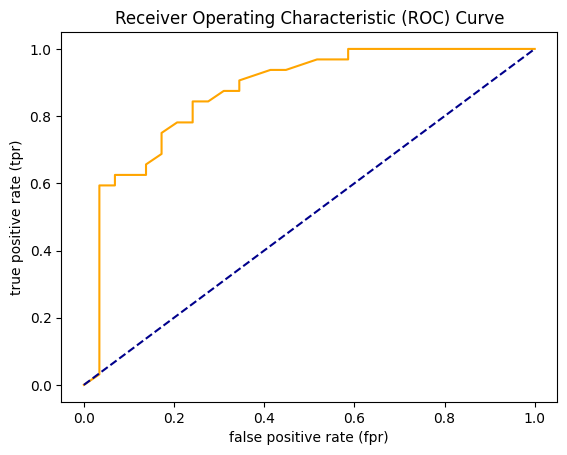

In [114]:
#Create a function for plotting ROC curves

import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (FPR) and true positive rate (TPR)
    """
    #plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color= "darkblue", linestyle="--", label="Guessing")

    #Customize the plot
    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("true positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.show()

plot_roc_curve(fpr, tpr)


In [115]:
#let's look at the AUC score to see how well our model is performing
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

np.float64(0.8717672413793104)

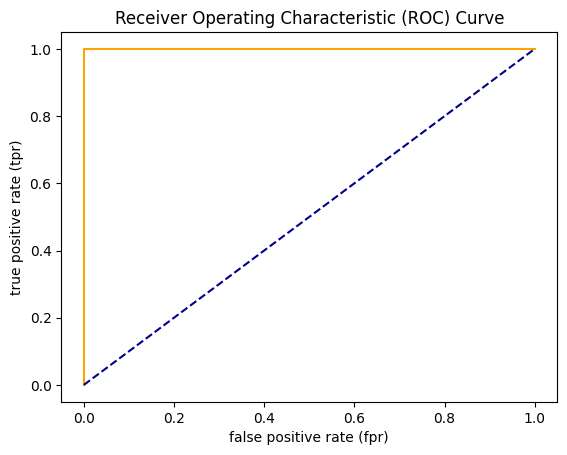

In [116]:
#plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)